In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\kelvin\OneDrive\Desktop\Spark\SampleSuperstore.csv')
print(df.shape)
df.head()

(9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.iloc[:,9:13].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


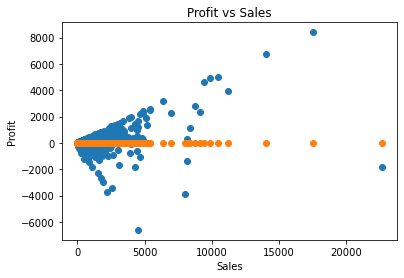

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['Sales'],df['Profit'])
plt.scatter(df['Sales'],df['Discount'])
plt.ylabel('Profit')
plt.xlabel('Sales')
plt.title('Profit vs Sales')
plt.show()

In [7]:
df["Profit"].corr(df["Sales"])

0.4790643497377063

In [8]:
df["Profit"].corr(df["Discount"])

-0.21948745637176842

In [9]:
df[df['Profit'] >= 28.656896]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.184,9,0.2,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,249.584,2,0.2,31.1980
9979,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,437.472,14,0.2,153.1152
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470


In [10]:
df.where(df['Profit']== df['Profit'].min()).dropna()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130.0,East,Technology,Machines,4499.985,5.0,0.7,-6599.978


In [11]:
df.where(df['Profit']== df['Profit'].max()).dropna()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905.0,Central,Technology,Copiers,17499.95,5.0,0.0,8399.976


In [12]:
prop_loss = round(len(df[df['Profit']<= 0])/len(df[df['Profit']> 0])*100,2)

print("Percentage of city making a loss",prop_loss)
print("Percentage of city making a Profit",(100-prop_loss))

Percentage of city making a loss 24.03
Percentage of city making a Profit 75.97


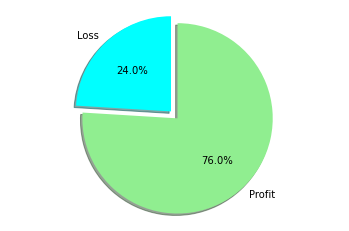

In [13]:
labels = 'Loss','Profit',
sizes = "24.03","75.97"
colors = ["cyan","lightgreen"]
explode = (0,0.1)
fig1,ax1 = plt.subplots()
ax1.pie(sizes,
        explode=explode,
        labels=labels,
        autopct="%1.1f%%",
        shadow=True,
        colors=colors,
        startangle=90)
ax1.axis("equal")
plt.show()

In [14]:
pr = df.groupby(df['Region'])["Profit"].value_counts().rename('frequency').to_frame().reset_index()

pr

,Region,Profit,frequency
0,Central,3.6288,16
1,Central,0.0000,11
2,Central,5.4432,10
3,Central,6.2208,6
4,Central,1.8144,5
...,...,...,...
8646,West,1379.9770,1
8647,West,1480.4671,1
8648,West,1644.2913,1
8649,West,1906.4850,1


In [15]:
import seaborn as sns

In [16]:
pr = pd.DataFrame(pr)

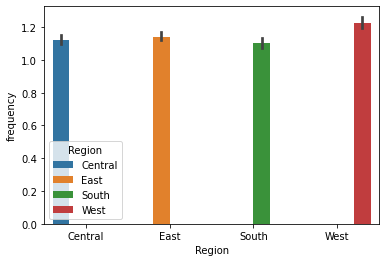

In [17]:
sns.barplot(
    x= 'Region',
    y= 'frequency',
    hue = "Region",
    data = pr,
#      order = Profit.values()
    
);

In [18]:
pr.groupby('Region')['frequency'].sum()

Region
Central    2323
East       2848
South      1620
West       3203
Name: frequency, dtype: int64

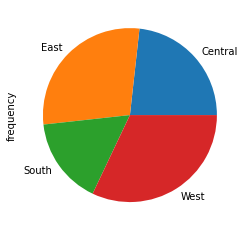

In [19]:
pr.groupby('Region')['frequency'].sum().plot(kind='pie');

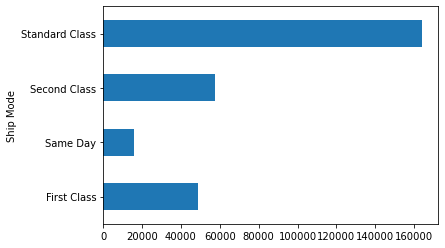

In [20]:
df.groupby(["Ship Mode"])["Profit"].sum().plot(kind='barh');

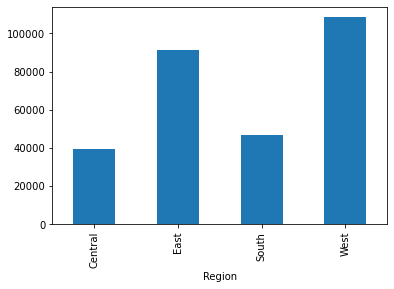

In [21]:
df.groupby(["Region"])["Profit"].sum().plot(kind='bar');

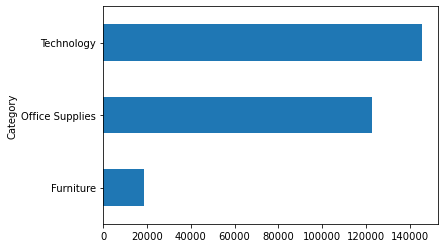

In [22]:
df.groupby(["Category"])["Profit"].sum().plot(kind='barh');

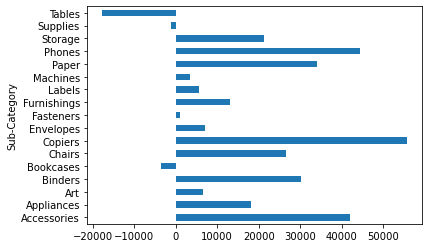

In [23]:
df.groupby(["Sub-Category"])["Profit"].sum().plot(kind='barh');

In [24]:
 df["State"].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [25]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [26]:
df.groupby(["Ship Mode","Segment"]).count()

Country  City  State  Postal Code  Region  \
Ship Mode      Segment                                                  
First Class    Consumer         769   769    769          769     769   
               Corporate        485   485    485          485     485   
               Home Office      284   284    284          284     284   
Same Day       Consumer         317   317    317          317     317   
               Corporate        114   114    114          114     114   
               Home Office      112   112    112          112     112   
Second Class   Consumer        1020  1020   1020         1020    1020   
               Corporate        609   609    609          609     609   
               Home Office      316   316    316          316     316   
Standard Class Consumer        3085  3085   3085         3085    3085   
               Corporate       1812  1812   1812         1812    1812   
               Home Office     1071  1071   1071         1071    1071   

                            Category  Sub-Category  Sales  Quantity  Discount  \
Ship Mode      Segment                                                          
First Class    Consumer          769           769    769       769       769   
               Corporate         485           485    485       485       485   
               Home Office       284           284    284       284       284   
Same Day       Consumer          317           317    317       317       317   
               Corporate         114           114    114       114       114   
               Home Office       112           112    112       112       112   
Second Class   Consumer         1020          1020   1020      1020      1020   
               Corporate         609           609    609       609       609   
               Home Office       316           316    316       316       316   
Standard Class Consumer         3085          3085   3085      3085      3085   
               Corporate        1812          1812   1812      1812      1812   
               Home Office      1071          1071   1071      1071      1071   

                            Profit  
Ship Mode      Segment              
First Class    Consumer        769  
               Corporate       485  
               Home Office     284  
Same Day       Consumer        317  
               Corporate       114  
               Home Office     112  
Second Class   Consumer       1020  
               Corporate       609  
               Home Office     316  
Standard Class Consumer       3085  
               Corporate      1812  
               Home Office    1071

In [27]:
df.groupby(["Ship Mode","Segment"])["Sales"].sum()

Ship Mode       Segment    
First Class     Consumer       159168.9650
                Corporate      105858.4699
                Home Office     86400.9880
Same Day        Consumer        60596.3590
                Corporate       45121.3230
                Home Office     22645.4430
Second Class    Consumer       231498.9496
                Corporate      146126.0388
                Home Office     81568.5810
Standard Class  Consumer       710137.0714
                Corporate      409040.5351
                Home Office    239038.1365
Name: Sales, dtype: float64

In [28]:
# df.groupby(["Region","Ship Mode"]).Profit.value_counts().reset_index(name ="name")

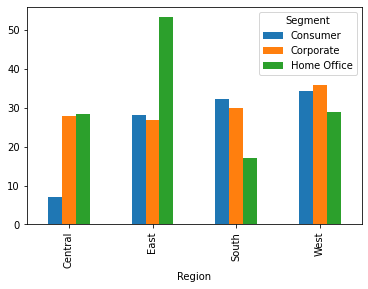

In [29]:
pv = df.pivot_table(index="Region",columns="Segment",values="Profit")
pv.plot(kind="bar");

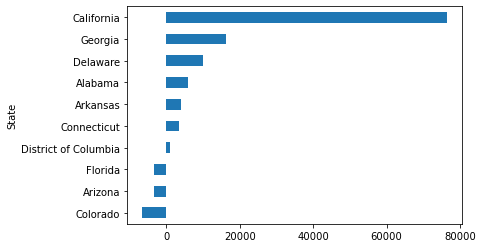

In [30]:
df.groupby(["State"]).Profit.sum().head(10).sort_values().plot(kind="barh");

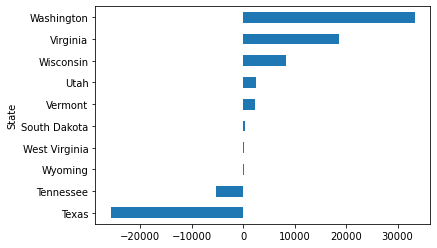

In [31]:
df.groupby(["State"]).Profit.sum().tail(10).sort_values().plot(kind="barh");

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

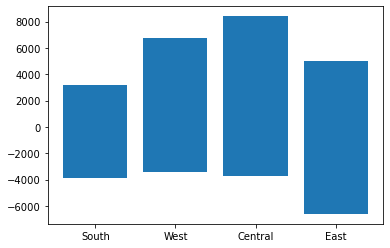

In [33]:
plt.bar(df["Region"],df["Profit"])

plt.show()

In [34]:
neg_profit = df.where(
    (df['Profit'] <= 0) 
         &
    (df['Region'] =="West" )
    &
      (df['Ship Mode'] =='Standard Class' )
).dropna()
neg_profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
95,Standard Class,Home Office,United States,Portland,Oregon,97206.0,West,Office Supplies,Binders,5.682,1.0,0.70,-3.7880
103,Standard Class,Consumer,United States,Aurora,Colorado,80013.0,West,Technology,Accessories,238.896,6.0,0.20,-26.8758
104,Standard Class,Consumer,United States,Aurora,Colorado,80013.0,West,Furniture,Furnishings,102.360,3.0,0.20,-3.8385
105,Standard Class,Consumer,United States,Aurora,Colorado,80013.0,West,Office Supplies,Binders,36.882,3.0,0.70,-25.8174
126,Standard Class,Consumer,United States,Phoenix,Arizona,85023.0,West,Office Supplies,Binders,2.388,2.0,0.70,-1.8308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9646,Standard Class,Consumer,United States,Glendale,Arizona,85301.0,West,Office Supplies,Binders,72.588,2.0,0.70,-48.3920
9654,Standard Class,Home Office,United States,Tucson,Arizona,85705.0,West,Office Supplies,Binders,4.938,2.0,0.70,-3.6212
9826,Standard Class,Consumer,United States,San Francisco,California,94122.0,West,Furniture,Chairs,195.136,4.0,0.20,-12.1960
9931,Standard Class,Consumer,United States,San Bernardino,California,92404.0,West,Furniture,Bookcases,683.332,4.0,0.15,-40.1960
